In [1]:
from utils import *
from HeteTrans import *

hete = Heterogeneity()
hete.check_torch_gpu()

-------------------------------------------------
------------------ VERSION INFO -----------------
Conda Environment: Python39 | Python version: 3.9.10 (tags/v3.9.10:f2f3f53, Jan 17 2022, 15:14:21) [MSC v.1929 64 bit (AMD64)]
Torch version: 2.0.0+cu117
Torch build with CUDA? True
# Device(s) available: 1, Name(s): NVIDIA GeForce RTX 3080



***
# END

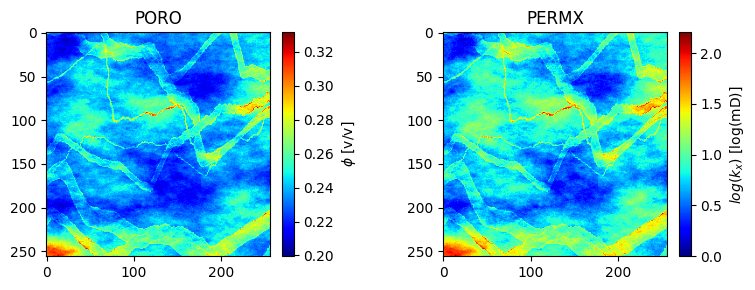

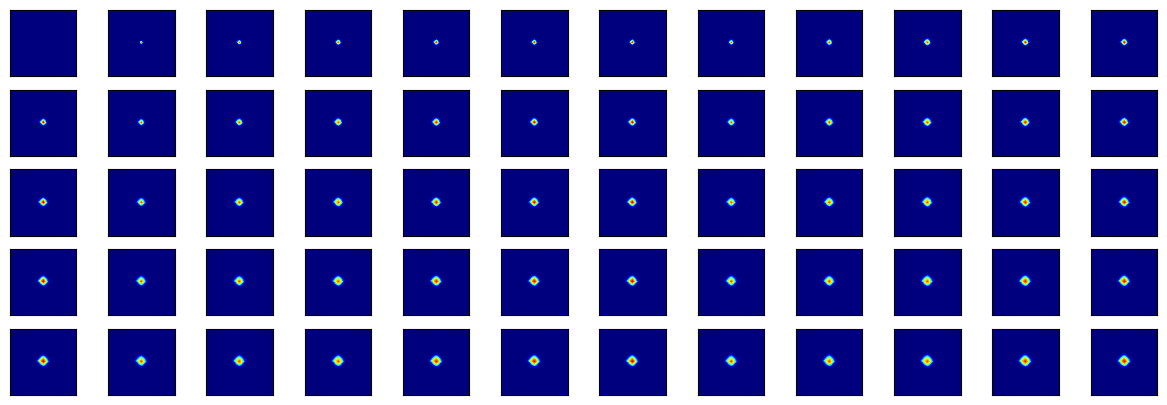

In [34]:
realization = 12
x1000 = loadmat('h2dataf/{}UHSS_0.mat'.format(realization), simplify_cells=True)
poro, perm = x1000['PORO'], np.log10(x1000['PERMX'])

sat = np.zeros((60,256,256))
for i in range(60):
    sgas = loadmat('h2dataf/{}UHSS_{}.mat'.format(realization, i), simplify_cells=True)['SGAS']
    ymf3 = loadmat('h2dataf/{}UHSS_{}.mat'.format(realization, i), simplify_cells=True)['YMF_3']
    sat[i] = sgas*ymf3

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(poro, 'jet')
plt.title('PORO'); plt.colorbar(pad=0.04, fraction=0.046, label='$\phi$ [v/v]')
plt.subplot(122)
plt.imshow(perm, 'jet')
plt.title('PERMX'); plt.colorbar(pad=0.04, fraction=0.046, label='$log(k_x)$ [log(mD)]')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(5, 12, figsize=(15,5))
k = 0
for i in range(5):
    for j in range(12):
        axs[i,j].imshow(sat[k], 'jet')
        axs[i,j].set(xticks=[], yticks=[])
        k += 1
plt.show()